# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.

The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.

The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox"/> Analysis of Dataset Features.

<input type="checkbox"/> Preparation of the data to put into an AI model.

<input type="checkbox"/> Study of the most suitable Ai model for the chosen dataset.

<input type="checkbox"/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.

<input type="checkbox"/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).

<input type="checkbox"/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.

<input type="checkbox"/> Feature Importance self Obtained.

## Valorization of the Process

<input type="checkbox"/>  Hardware for acquiring the dataset.

<input type="checkbox"/>  Application of data combination techniques (example: data alignment, 
downsampling/upsampling, etc...).

<input type="checkbox"/>  Application of data quality improvement techniques (example: filters).

<input type="checkbox"/>  Extraction of additional features from the initial data (example: FFT/MFCC from an audio window 
from an audio window, etc...).

<input type="checkbox"/>  Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18
@JoaquinDillen
@nunof98




# Hardware Acquisition Dataset

This is the process to get the raw data collected in Home Assistant in the right format for the analysis within the sklearn libraries and respective functions using a time stamp of 15 minute between each datapoint. 

Taking Average values when more than one is present durinng our window lenght and more


In [22]:
# Imports
import numpy as np
import pandas as pd
from datetime import time
from datetime import datetime
from datetime import timedelta
import re

# Analysis of Dataset Features

## Load Dataset

In [268]:
import numpy as np
import pandas as pd

#Dataset Choice
#ds_name = 'dataset_V1'
# ds_name = 'dataset_V1_2'
# ds_name = 'dataset_V2'

#Dataset with preclassification of Apps (Names of Applications changed)
ds_name = 'PreClasifiing Features/dataset_V1'
#ds_name = 'PreClasifiing Features/dataset_V2'

# Load dataset
df = pd.read_csv('datasets/'+ ds_name + '.csv')
# df

In [269]:
# Put time colum as index
df = df.set_index('time')
# df


## Analysis of Dataset Features
Analyses the statistical information about each and every single Variable. 

In [208]:
#print describe information about features
df.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,65.701824,2.571404,212.029130,19.840668,22.161800,115.261931,54.308467,-24.095224,...,12.011089,2.288899,21117.117435,2.708451,4.004726,3.812421,0.671618,0.035222,0.962688,0.332182
std,0.012065,0.414615,429.619220,3.731159,412.718471,8.586159,36.712059,160.083058,32.112288,29.331055,...,15.779058,2.344625,30595.807787,3.046022,5.132431,4.328333,1.292121,0.068907,2.355609,0.457608
min,0.000000,-3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,0.000000,0.000000,29.000000,-54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012000,0.000000,0.000000,1.000000,0.000000,21.400000,0.000000,0.000000,58.000000,-1.000000,...,3.171000,2.500000,7169.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021000,0.000000,21.714286,3.800000,0.000000,25.050000,27.000000,234.000000,81.000000,0.000000,...,18.885000,5.000000,44298.000000,6.000000,7.000000,7.333333,0.726000,0.039000,0.000000,0.500000
max,0.064000,5.480000,15635.727273,22.500000,1029.650000,41.300000,237.500000,680.200000,100.000000,0.000000,...,52.314000,8.000000,102229.000000,8.000000,24.000000,15.000000,5.681000,0.340500,14.000000,2.000000


In [209]:
# Information about the Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

In [210]:
# check missing values in variables
df.isnull().sum()

app_memory                    0
battery_power                 0
last_update_trigger           0
light_sensor                  0
active_notification_count     0
pressure_sensor               0
battery_temperature           0
screen_brightness             0
device_locked                 0
wifi_link_speed               0
interactive                   0
doze_mode                     0
battery_level                 0
wifi_signal_strength          0
total_tx_gb                   0
wifi_frequency                0
app_rx_gb                     0
app_tx_gb                     0
last_used_app                 0
total_rx_gb                   0
detected_activity             0
proximity_sensor              0
steps_sensor                  0
headphones                    0
volume_level_call             0
volume_level_music            0
volume_level_accessibility    0
music_active                  0
wifi_connection               0
network_type                  0
mobile_rx_gb                  0
mobile_t

In [211]:
# Types of features
df.dtypes

app_memory                    float64
battery_power                 float64
last_update_trigger            object
light_sensor                  float64
active_notification_count     float64
pressure_sensor               float64
battery_temperature           float64
screen_brightness             float64
device_locked                  object
wifi_link_speed               float64
interactive                    object
doze_mode                      object
battery_level                 float64
wifi_signal_strength          float64
total_tx_gb                   float64
wifi_frequency                float64
app_rx_gb                     float64
app_tx_gb                     float64
last_used_app                  object
total_rx_gb                   float64
detected_activity              object
proximity_sensor              float64
steps_sensor                  float64
headphones                     object
volume_level_call             float64
volume_level_music            float64
volume_level

## Create and Apply Encoders for the Qualitative Features


In [270]:
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['headphones', 'last_update_trigger', 'device_locked', 'interactive', 'doze_mode', 'detected_activity', 'music_active', 'wifi_connection', 'network_type','audio_mode','phone_state','bluetooth_connection','bluetooth_state','battery_state','is_charging','charger_type','battery_health','ble_transmitter','do_not_disturb_sensor','screen_off_timeout','speakerphone','mobile_data','wifi_state','power_save','device_id'])

df = encoder.fit_transform(df)
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


## Separate the Features in X and Y

In [271]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [272]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00    unavaliable
2023-01-17 00:30:00    unavaliable
2023-01-17 00:45:00    unavaliable
2023-01-17 01:00:00    unavaliable
2023-01-17 01:15:00    unavaliable
                          ...     
2023-01-26 19:00:00     Navigating
2023-01-26 19:15:00     Navigating
2023-01-26 19:30:00     Navigating
2023-01-26 19:45:00     Navigating
2023-01-26 20:00:00     Navigating
Name: last_used_app, Length: 5664, dtype: object

# Classify Algorithms

In [273]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


# PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

## PCA Classifier

In [182]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [200]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

In [201]:
X_pca.shape, y.shape

((5664, 8), (5664,))

In [202]:
#PCA variance_ratio
# The percentage of the explained variance is:
# explained_variance_ratio_

# The variance i.e. the eigenvalues of the covariance matrix is:
# explained_variance_

# Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)


# pca.explained_variance_, np.sum(pca.explained_variance_)
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([9.94993812e-01, 4.73875500e-03, 1.93734549e-04, 6.35523571e-05,
        7.34434976e-06, 1.10484221e-06, 1.03350080e-06, 3.81736814e-07]),
 0.9999997181633101)

## Decision tree Classifier

In [264]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [265]:
# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_clf_gini)))

Model accuracy score with criterion gini index: 0.6518


In [266]:
from sklearn.metrics import classification_report

print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_clf_gini))

Train accuracy:	 0.6556508577194753
Test accuracy:	 0.6517647058823529
              precision    recall  f1-score   support

     CHP2371       1.00      0.52      0.69       278
     CPH2197       0.97      0.55      0.70       269
     PIXEL3A       1.00      0.64      0.78       274
     SMA336B       1.00      0.62      0.76       296
     SMA528B       0.32      1.00      0.48       271
     SMG960F       1.00      0.59      0.74       312

    accuracy                           0.65      1700
   macro avg       0.88      0.65      0.69      1700
weighted avg       0.89      0.65      0.70      1700



## LDA Classifier

In [274]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(5664, 3)

In [275]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


## MLP Classifier

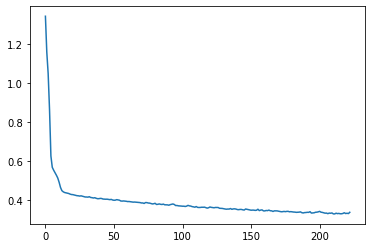

In [276]:
# build MLP (Multi Layer Perception) classifier
clf_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda = clf_lda.fit(X_train_lda, y_train_lda)
plt.plot(clf_lda.loss_curve_)

In [277]:
# make prediction
y_pred_lda_mlp = model_lda.predict(X_test_lda)
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')

print(classification_report(y_test_lda, y_pred_lda_mlp))

Train accuracy:	 0.8673057517658931
Test accuracy:	 0.8488235294117648
               precision    recall  f1-score   support

Entertainment       0.66      0.63      0.64       210
   Navigating       0.76      0.72      0.74       283
         Work       0.78      0.82      0.80       536
  unavaliable       1.00      1.00      1.00       671

     accuracy                           0.85      1700
    macro avg       0.80      0.79      0.79      1700
 weighted avg       0.85      0.85      0.85      1700



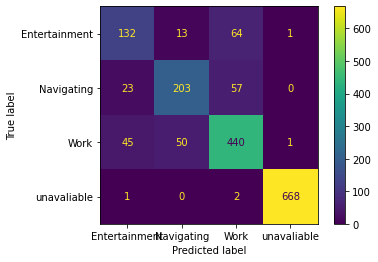

In [278]:
from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test_lda,y_pred_lda_mlp)
# disp = ConfusionMatrixDisplay(confusion_matrix = cm)
# disp.plot()

disp = ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_lda_mlp)




## KNeighbors Classifier

In [279]:
# Imports
from sklearn.neighbors import KNeighborsClassifier

In [280]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [281]:
y_pred_neigh = neigh.predict(X_test)

In [282]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_neigh)))

Model accuracy score with criterion gini index: 0.9182


In [283]:
from sklearn.metrics import classification_report

print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')

print(classification_report(y_test, y_pred_neigh))

Train accuracy:	 0.9606458123107972
Test accuracy:	 0.918235294117647
               precision    recall  f1-score   support

Entertainment       0.79      0.92      0.85       210
   Navigating       0.82      0.92      0.86       283
         Work       0.95      0.83      0.89       536
  unavaliable       1.00      0.98      0.99       671

     accuracy                           0.92      1700
    macro avg       0.89      0.92      0.90      1700
 weighted avg       0.92      0.92      0.92      1700



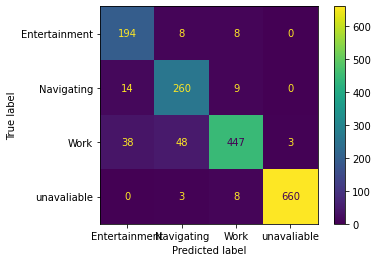

In [284]:
disp = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_neigh)